<a href="https://colab.research.google.com/github/GKS07/NLP-Projects/blob/main/Zoamto_Resturents_EDA_%26_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis of Zomato Restaurant in Banglore**

This data is on kaggle having the information of resataurants in banglore. I will do EDA, some data preprocessing and then i'll use reviews given to each rastaurants for sentiment analysis.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gau7rav","key":"50c43821a9373319816f6b8412be5c26"}'}

In [ ]:
#making the Kaggle Directopry and copying the kaggle jason file.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

#changing the permission.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#downloading the data.

!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants


 82% 73.0M/89.0M [00:00<00:00, 130MB/s]
100% 89.0M/89.0M [00:00<00:00, 133MB/s]


In [ ]:

# making the directory
! mkdir Zomato_Restaurant_Data_in_Banglore

# unzipping the file.
! unzip zomato-bangalore-restaurants.zip -d Zomato_Restaurant_Data_in_Banglore

Archive:  zomato-bangalore-restaurants.zip
  inflating: Zomato_Restaurant_Data_in_Banglore/zomato.csv  


In [ ]:
# importing the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split


In [ ]:
zomato = pd.read_csv("/content/Zomato_Restaurant_Data_in_Banglore/zomato.csv")

zomato.head(4)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


In [ ]:
zomato['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

# EDA:

**The Exploratory Data Analysis is done on Tablue public:**

# Preprocessing the data for Sentiment Analysis.<br>

in this section i'll create a new dataframe of reviews from reviews_list of Zomato dataframe.

In [ ]:
# extracting the reviews and ratings from the review_list

review = []

for rating in zomato['reviews_list']:
  rating = eval(rating)
  for rate, stri in rating:
    if rate:
      rate = rate.strip("Rated").strip()
      rate = float(rate)
      stri = stri.strip("RATED").strip()
      review.append([stri, rate])



In [ ]:
review[21]

['A decent place for a family lunch or dinner.. well arranged in a simple manner. Food was tasty and the crew was very helpful and understanding..',
 3.0]

In [ ]:
#creating a Dataframe

Reviews = pd.DataFrame(review, columns = ['Review', 'Rating'])

Reviews.head()

,Review,Rating
0,A beautiful place to dine in.The interiors tak...,4.0
1,I was here for dinner with my family on a week...,4.0
2,Its a restaurant near to Banashankari BDA. Me ...,2.0
3,We went here on a weekend and one of us had th...,4.0
4,The best thing about the place is itÃÃÃÃ...,5.0


In [ ]:
# Applying regular expression to eliminate extra symbols
import re
Reviews['Review'] = Reviews['Review'].apply(lambda x : re.sub('[^a-zA-Z]'," ",x))


In [ ]:
Reviews.head()

,Review,Rating
0,A beautiful place to dine in The interiors tak...,4.0
1,I was here for dinner with my family on a week...,4.0
2,Its a restaurant near to Banashankari BDA Me ...,2.0
3,We went here on a weekend and one of us had th...,4.0
4,The best thing about the place is it ...,5.0


In [ ]:
#shape of the DF
Reviews.shape

(1319968, 2)

Now we change the Rating to 0 for negative reviews and 1 fro positive reviews. i assume below or equal to 2.5 is negative reviews, thus turning it to 0 and above 2.5 as positive reviews, thus turning it to 1.

In [ ]:
#Adding the Sentiment column in dataframe.
Reviews['Sentiment'] = Reviews['Rating'].apply(lambda x: 1 if int(x) > 2.5 else 0)

In [ ]:
Reviews.head()

,Review,Rating,Sentiment
0,A beautiful place to dine in The interiors tak...,4.0,1
1,I was here for dinner with my family on a week...,4.0,1
2,Its a restaurant near to Banashankari BDA Me ...,2.0,0
3,We went here on a weekend and one of us had th...,4.0,1
4,The best thing about the place is it ...,5.0,1


In [ ]:
Reviews['Sentiment'].value_counts()

1    1071671
0     248297
Name: Sentiment, dtype: int64

In [ ]:
print("The percentage of the +ve sentiment is:", round(Reviews['Sentiment'].value_counts()[1]/len(Reviews['Sentiment']) * 100,2), "%")
print("The percentage of the -ve sentiment is:", round(Reviews['Sentiment'].value_counts()[0]/len(Reviews['Sentiment']) * 100,2), "%")

The percentage of the +ve sentiment is: 81.19 %
The percentage of the -ve sentiment is: 18.81 %


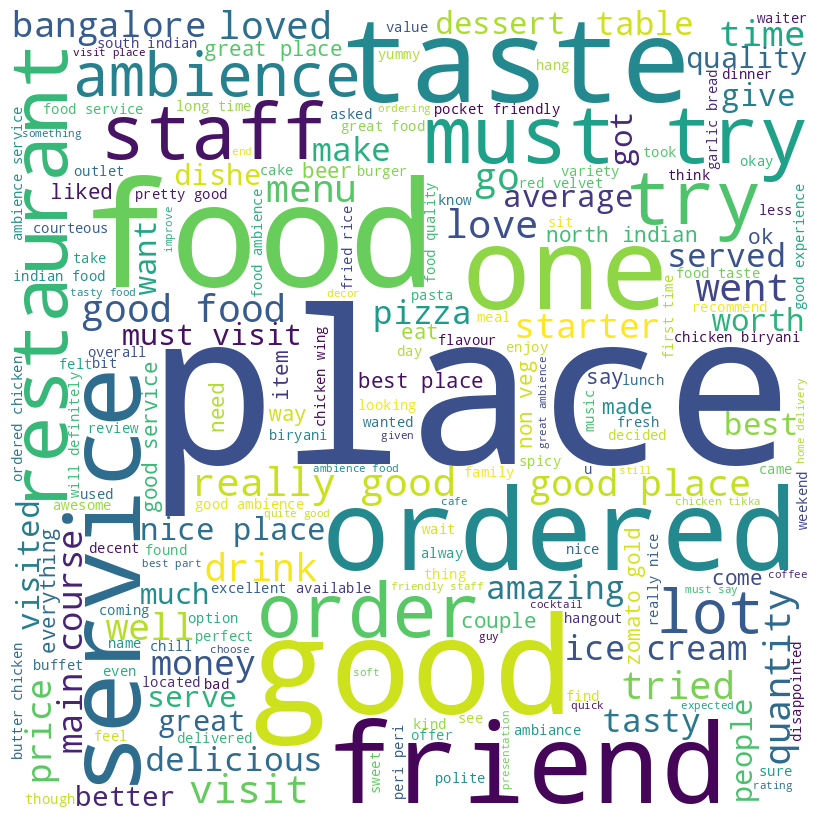

In [ ]:
# plotting the Words used in reviews.

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the each Sentiment.

for val in Reviews.Review:

    # typecaste each val to string

    val = str(val)

    # split the value

    tokens = val.split()

    # Converts each token into lowercase

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# lets plot the words that are used in -ve and =ve reviews.

pos_rev = Reviews.loc[Reviews['Sentiment'] == 1]   # taking the +ve reviews out from the original dataframe.

neg_rev = Reviews.loc[Reviews['Sentiment'] == 0]   # taking the -ve reviews out from the original dataframe.


In [ ]:
# plpotting the +ve reviews

pos_comment = ''

for val in pos_rev.Review:

    # typecaste each val to string

    val = str(val)

    # split the value

    tokens = val.split()

    # Converts each token into lowercase

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    pos_comment += " ".join(tokens)+" "


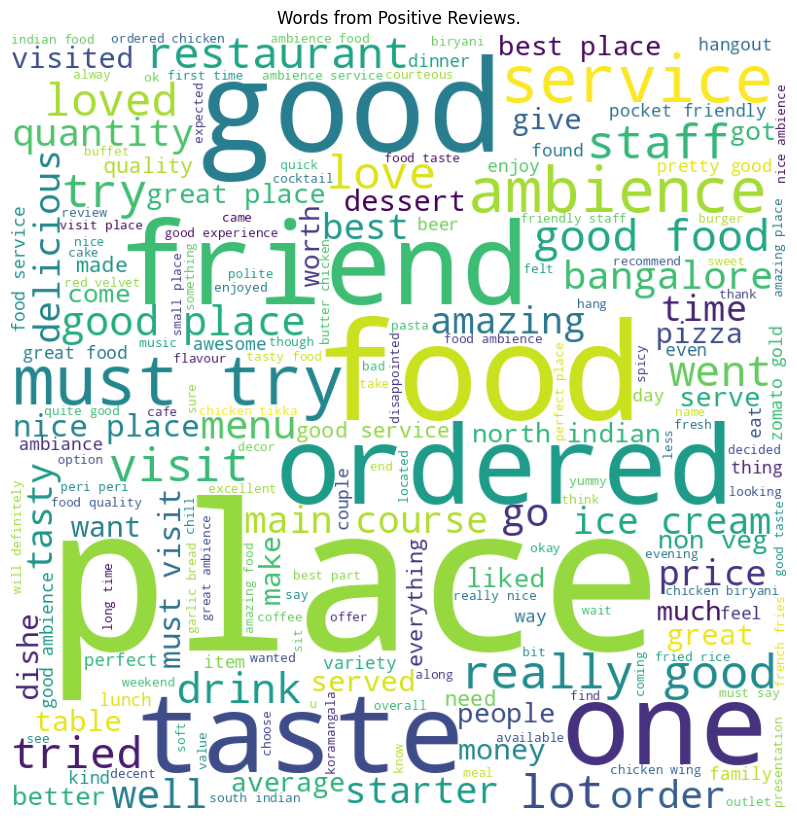

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(pos_comment)

# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Words from Positive Reviews.")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# plpotting the -ve reviews

neg_comment = ''

for val in neg_rev.Review:

    # typecaste each val to string

    val = str(val)

    # split the value

    tokens = val.split()

    # Converts each token into lowercase

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    neg_comment += " ".join(tokens)+" "


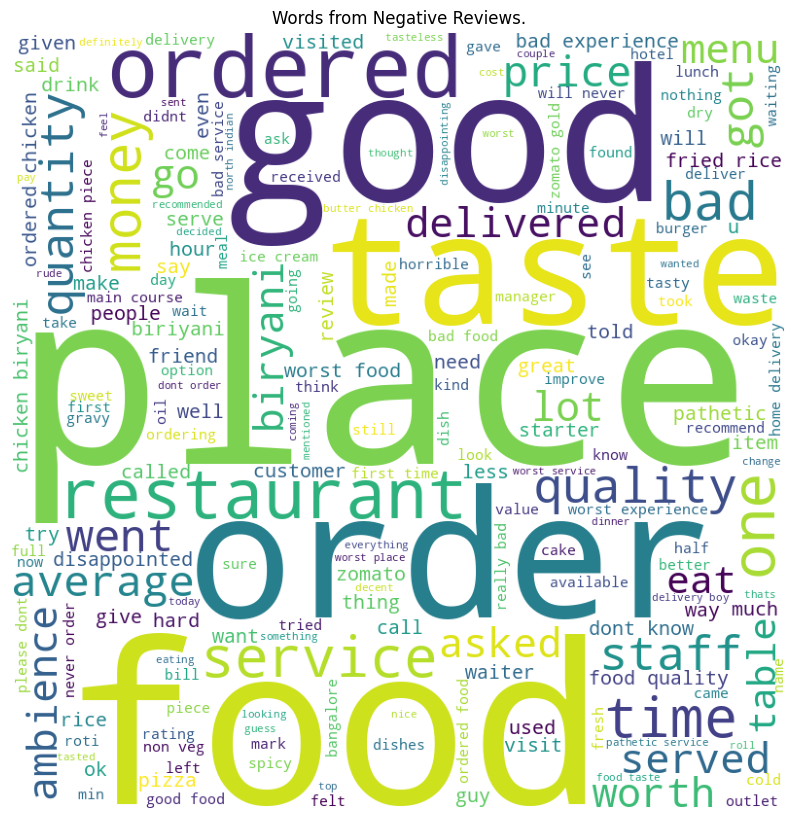

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(neg_comment)

# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Words from Negative Reviews.")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Text preprocessing

In [ ]:
# importing the useful libraries

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Shuffling and splitting the data frame dur to run time out.

Reviews = Reviews.sample(frac=1)

In [ ]:
# filltering the -ve and +ve sentiments

neg_sent = Reviews.loc[Reviews['Sentiment'] == 0][ : 25000]

pos_sent = Reviews.loc[Reviews['Sentiment'] == 1][:25000]

In [ ]:
# now concatinating both df as one

final_review = pd.concat([neg_sent, pos_sent])

# shuffing the data again
final_review = final_review.sample(frac = 1, random_state = 62)
final_review = final_review.reset_index()

In [ ]:
final_review["Sentiment"].value_counts()

0    25000
1    25000
Name: Sentiment, dtype: int64

In [ ]:
final_review.isnull().sum()

index        0
Review       0
Rating       0
Sentiment    0
dtype: int64

In [ ]:
final_review.shape

(50000, 4)

In [ ]:
final_review = final_review.drop('index', axis = 1)

In [ ]:
final_review.head()

,Review,Rating,Sentiment
0,we had very bad experience i ordered cake for...,1.0,0
1,The only this good about this place is the qua...,1.0,0
2,I have both dine in experience as well as orde...,2.0,0
3,The food they provide is definitely not worth ...,1.0,0
4,Wifi that doesnt work Convenient access and m...,1.0,0


In [ ]:
# Splitting the target variable

comment = final_review.iloc[:,0]

rate = final_review['Sentiment']

In [ ]:
comment[0], rate[25000]

('we had very bad experience  i ordered cake for our office anniversary n it was around  k but it was very bad taste no one touched it n it was not fresh  they gave some thing else to taste but when we got something else was their  chef bakers spoiled our celebration   amma s n just bake is best den chef bakers ',
 1)

In [ ]:
# processing the words.

def text_preprocessing(data):
  ps = PorterStemmer()
  bag = []
  for i in range(0, len(data)):
      rev = re.sub('[^a-zA-Z]', ' ', data[i])
      rev = data[i].lower()
      rev = rev.split()

      rev = [ps.stem(word) for word in rev if not word in stopwords.words('english')]
      rev = ' '.join(rev)
      bag.append(rev)
  return bag

In [ ]:
stemmed_comm = text_preprocessing(comment)

In [ ]:
stemmed_comm[1]

'good place qualiti tast indian cuisin love daal paneer chicken dish place laziest ignor staff everi order remind time even get addit glass water bottl take minut last time visit switch ac min close time refus accept food order music play loud almost imposs hear even person sit next'

In [ ]:
# importing the libraries

import nltk
import tensorflow as tf
from gensim.models import word2vec
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU


In [ ]:
# vectorizing the data

def vectorizer(stem_comm):
  tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
  vecto_text = tfidf.fit_transform(stem_comm).toarray()
  return vecto_text

In [ ]:
vec_reviews = vectorizer(stemmed_comm)

In [ ]:
vec_reviews.shape

(50000, 5000)

In [ ]:
# feature reduction through PCA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 10, svd_solver = 'full')
pca.fit(vec_reviews)

PCA(n_components=10, svd_solver='full')

In [ ]:
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[1.73735521 0.79576866 0.6587538  0.59283683 0.51954943 0.47287397
 0.46555836 0.44583834 0.41140534 0.39801799]


In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)

Cumulative Variances (Percentage):
[1.73735521 2.53312388 3.19187768 3.78471451 4.30426394 4.77713791
 5.24269627 5.68853461 6.09993995 6.49795794]


In [ ]:
print(pca.singular_values_)

[29.04740888 19.65877735 17.88647067 16.9680008  15.88460876 15.1542969
 15.03661746 14.71471291 14.13507278 13.9031894 ]


In [ ]:
# transformnig the data into lower dimension

trans_rev = pca.transform(vec_reviews)

In [ ]:
print("shape of the original reviews:", vec_reviews.shape)
print("shape of the transformed reviews:", trans_rev.shape)

shape of the original reviews: (50000, 5000)
shape of the transformed reviews: (50000, 10)


In [ ]:
#creating the classifier model


#for early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)
#sequential model, initialising the ANN model
classifier = Sequential()

#adding the input layers
classifier.add(Dense(units = 10, activation = 'ReLU'))

classifier.add(Dense(units = 10, activation = 'ReLU'))
classifier.add(Dense(units = 7, activation = 'ReLU'))
classifier.add(Dense(units = 5, activation = 'ReLU'))
classifier.add(Dense(units = 3, activation = 'ReLU'))


classifier.add(Dense(units = 1, activation = 'sigmoid'))

# compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
# training the model

model_history = classifier.fit(trans_rev, rate, validation_split = 0.2, callbacks=[callback], verbose = 1, batch_size = 10, epochs = 50)

Epoch 1/50
4000/4000 [==============================] - 22s 4ms/step - loss: 0.4062 - accuracy: 0.8222 - val_loss: 0.3803 - val_accuracy: 0.8355
Epoch 2/50
4000/4000 [==============================] - 16s 4ms/step - loss: 0.3742 - accuracy: 0.8375 - val_loss: 0.3746 - val_accuracy: 0.8405
Epoch 3/50
4000/4000 [==============================] - 19s 5ms/step - loss: 0.3693 - accuracy: 0.8412 - val_loss: 0.3701 - val_accuracy: 0.8413
Epoch 4/50
4000/4000 [==============================] - 18s 5ms/step - loss: 0.3648 - accuracy: 0.8422 - val_loss: 0.3790 - val_accuracy: 0.8348
Epoch 5/50
4000/4000 [==============================] - 17s 4ms/step - loss: 0.3627 - accuracy: 0.8444 - val_loss: 0.3726 - val_accuracy: 0.8404
Epoch 6/50
4000/4000 [==============================] - 17s 4ms/step - loss: 0.3603 - accuracy: 0.8450 - val_loss: 0.3662 - val_accuracy: 0.8442
Epoch 7/50
4000/4000 [==============================] - 16s 4ms/step - loss: 0.3588 - accuracy: 0.8447 - val_loss: 0.3639 - val_ac

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (10, 10)                  110       
                                                                 
 dense_1 (Dense)             (10, 10)                  110       
                                                                 
 dense_2 (Dense)             (10, 7)                   77        
                                                                 
 dense_3 (Dense)             (10, 5)                   40        
                                                                 
 dense_4 (Dense)             (10, 3)                   18        
                                                                 
 dense_5 (Dense)             (10, 1)                   4         
                                                                 
Total params: 359 (1.40 KB)
Trainable params: 359 (1.40 

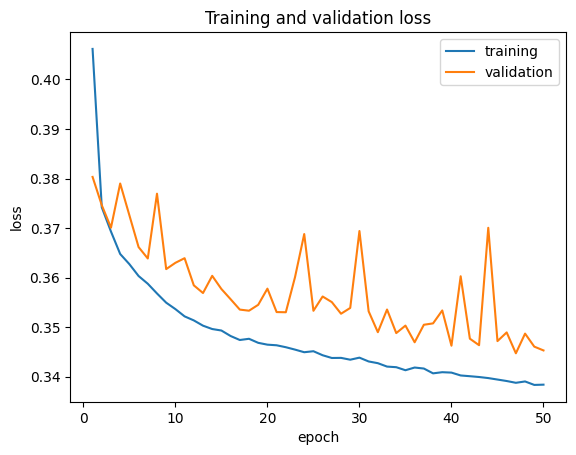

In [ ]:
#plotting the training and validation data.
%matplotlib inline

epoch_nums = range(1,50+1)
training_loss = model_history.history["loss"]
validation_loss = model_history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.title("Training and validation loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

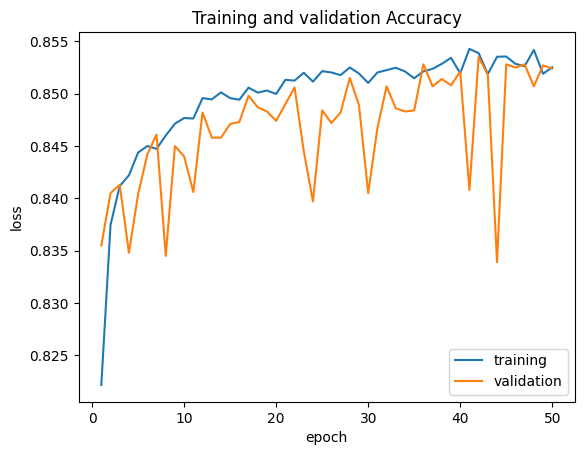

In [ ]:
epoch_nums = range(1,50+1)
training_acc = model_history.history["accuracy"]
validation_acc = model_history.history["val_accuracy"]
plt.plot(epoch_nums, training_acc)
plt.plot(epoch_nums, validation_acc)
plt.title("Training and validation Accuracy")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [ ]:
# Evaluating the model:

# creating the test data:

test_neg_sent = Reviews.loc[Reviews['Sentiment'] == 0][25001: 30000]

test_pos_sent = Reviews.loc[Reviews['Sentiment'] == 1][25001: 30000]

In [ ]:
test_final_review = pd.concat([test_neg_sent, test_pos_sent])

# shuffing the data again
test_final_review = test_final_review.sample(frac = 1, random_state = 62)
test_final_review = test_final_review.reset_index()

In [ ]:
test_final_review.head()

,index,Review,Rating,Sentiment
0,659886,Nice and cheap place with good food If you ar...,3.0,1
1,938273,Scrumptious scrumptious chutney Just for this...,4.0,1
2,334978,Roti was a bit rubbery,2.0,0
3,450362,The sandwich was filled with mayonnaise Taste...,2.0,0
4,581409,Some really tasty shakes at Cad B Cad M The p...,5.0,1


In [ ]:
test_final_review = test_final_review.drop("index", axis = 1)
test_final_review.head()

,Review,Rating,Sentiment
0,Good service,5.0,1
1,Location is just below Boozy Griffin in the sa...,4.0,1
2,Worst service ever Food is as it is Wors...,1.0,0
3,Not sure how this place is so highly rated We...,2.0,0
4,It is heaven for Drinkers These people have t...,4.0,1


In [ ]:
# Splitting the target variable

test_comment = test_final_review.iloc[:,0]

test_rate = test_final_review['Sentiment']

In [ ]:
test_comment[1], test_rate[1]

('Scrumptious scrumptious chutney  Just for this I like to order from this place often  A great place to satisfy your morning idli vada dosa cravings                                                                                                    The sagu they serve with the set dosa is pretty delicious too   When Amrut Vegetarian which used to be at this location closed down  I had felt quite sad  That place was full of nostalgia for me  And some yummy food too   Then Anna Kuteera opened up  Initially I was feeling sulky about trying this place out  But when I finally did  one taste of that chutney and I was hooked   I still miss you Amrut  but sorry  you have been replaced and replaced well                                                                                                   ',
 1)

In [ ]:
test_rate.value_counts()

1    4999
0    4999
Name: Sentiment, dtype: int64

In [ ]:
# stemming the test data
test_stemmed_comm = text_preprocessing(test_comment)

In [ ]:
test_stemmed_comm[1]

'scrumptiou scrumptiou chutney like order place often great place satisfi morn idli vada dosa crave sagu serv set dosa pretti delici amrut vegetarian use locat close felt quit sad place full nostalgia yummi food anna kuteera open initi feel sulki tri place final one tast chutney hook still miss amrut sorri replac replac well'

In [ ]:
# vecttorizing the test data
test_vec_reviews = vectorizer(test_stemmed_comm)

In [ ]:
test_vec_reviews.shape, test_rate.shape

((9998, 5000), (9998,))

In [ ]:
#reducing the dimension

pca.fit(test_vec_reviews)

PCA(n_components=10, svd_solver='full')

In [ ]:
# transforming the data

test_trans_rev = pca.transform(test_vec_reviews)

In [ ]:
test_trans_rev.shape

(9998, 10)

In [ ]:
loss, Accuracy = classifier.evaluate(test_trans_rev, test_rate)

313/313 [==============================] - 1s 3ms/step - loss: 0.4398 - accuracy: 0.8098


In [ ]:
print("the loss of the model is:", loss)
print("the Accuracy of the model is:", Accuracy)

the loss of the model is: 0.4397994875907898
the Accuracy of the model is: 0.8097619414329529


In [ ]:
# saving the model

from keras.models import load_model
classifier.save("Zomato_res_sentiment_anlysis.h5")

# loading the model

"""loaded_model = load_model("Zomato_res_sentiment_anlysis.h5")
loss, accuracy = loaded_model.evaluate(test_trans_rev, test_rate)"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'loaded_model = load_model("Zomato_res_sentiment_anlysis.h5") \nloss, accuracy = loaded_model.evaluate(test_trans_rev, test_rate)'

In [ ]:
pred_rate = classifier.predict(test_trans_rev)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred = []
for i in pred_rate:
  ra_te = int(np.round(i))
  pred.append(ra_te)
print(len(pred))

9998


In [ ]:
# plotting thte confusion matrics

from sklearn.metrics import confusion_matrix

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Sentiment analysis of Zomato Restaurants',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


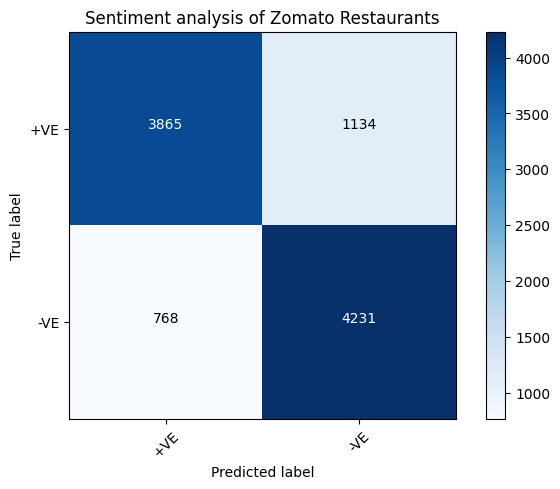

In [ ]:
cm = confusion_matrix(test_rate, pred)
plot_confusion_matrix(cm, classes=['+VE', '-VE'])